# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

16464


In [2]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [3]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections_2color')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

creating folder: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color


# Illumination_correction

In [4]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if 'Cy' in _fd or 'H0R0' in _fd]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 83
- Number of field of views: 64
['\\\\10.245.74.158\\Chromatin_NAS_6\\20201002-B_dox-IAA-STI+_CTP-08_IgH\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_6\\20201002-B_dox-IAA-STI+_CTP-08_IgH\\H81R24Cy7', '\\\\10.245.74.158\\Chromatin_NAS_6\\20201002-B_dox-IAA-STI+_CTP-08_IgH\\H82R24Cy5']


In [5]:
# shared parameters
single_im_size = np.array([35,2048,2048])
all_colors = ['750','647','488','405']
# image and threads
num_images = 48
num_threads = 12

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '488', '405'] illumination profiles
-- 48 among 64 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H0R0
++ start multi-processing illumination profile calculateion with 12 threads for 48 images in 1266.30s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color\illumination_correction_647_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color\illumination_correction_488_2048x2048.npy
--- saving 405 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color\illumination

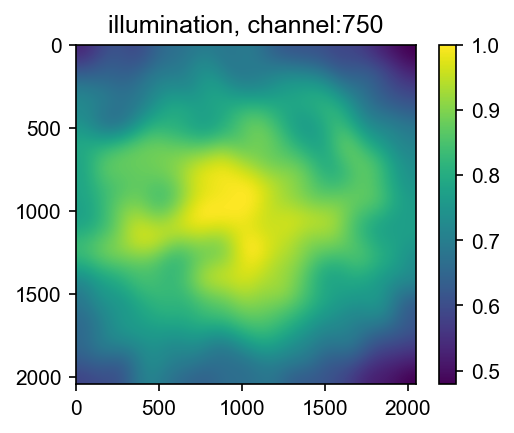

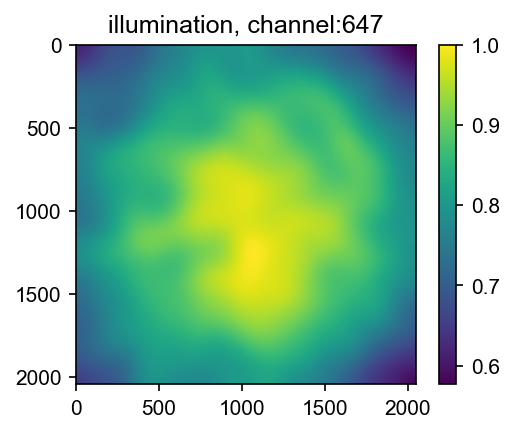

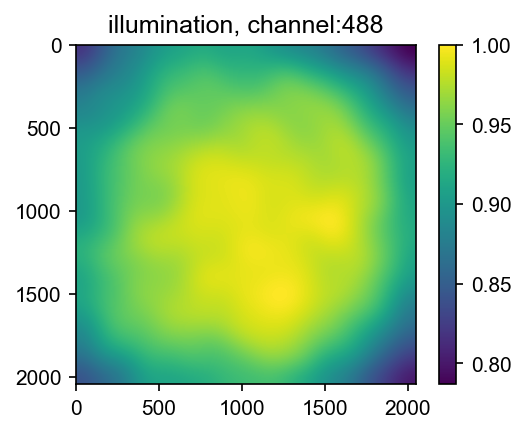

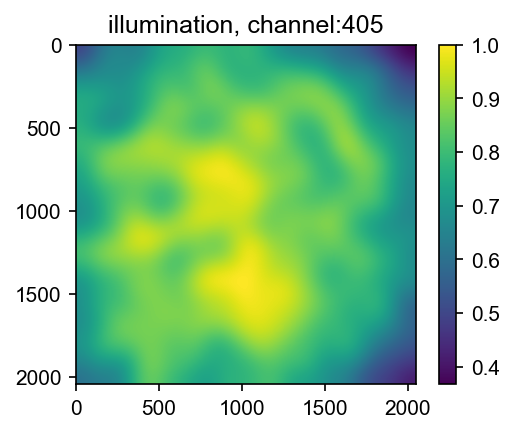

-- finish generating illumination profiles, time:1280.51s


In [8]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=False,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [9]:
cc_folder = folders[1]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H81R24Cy7 \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H82R24Cy5


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 48 images in 12 threads in 3127.250s.
++ fitting polynomial orders: [1 1 1]
-- constants: [1.92965610e-01 1.62600327e-02 1.26938763e-06 4.21709602e-05] with rsquare=0.28213854960844775
-- constants: [-1.93928915e-02 -5.27306729e-04 -1.73175138e-03  7.35787135e-06] with rsquare=0.9271763206549347
-- constants: [-9.42612487e-02  1.12234059e-03 -4.68452879e-07 -1.72886611e-03] with rsquare=0.9272723840284628
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color


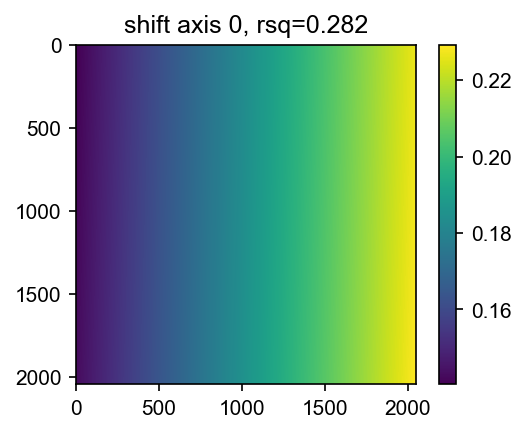

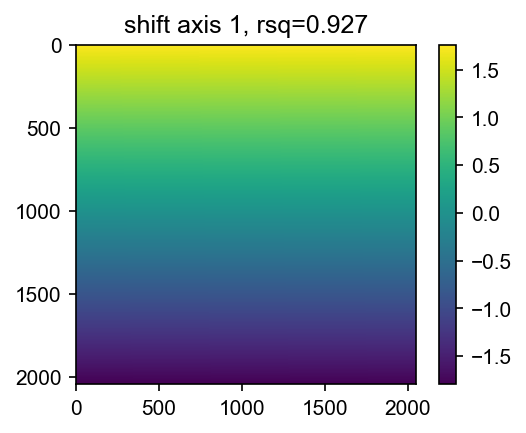

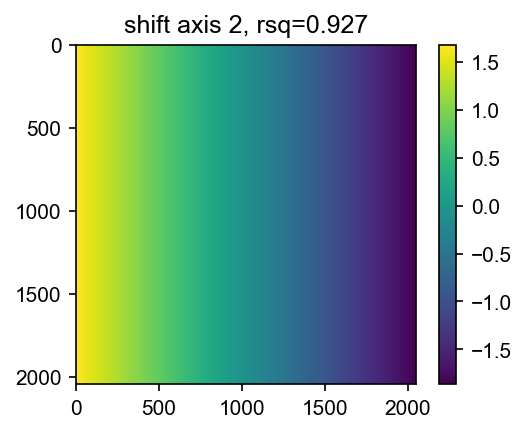

In [10]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, 
                                    num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True)

### check chromatic abbrevation, 750-647

In [12]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])


# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H82R24Cy5\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H82R24Cy5\Conv_zscan_05.dax  in 23.806s
-- removing hot pixels for channels:['647', '488'] in 17.734s
-- illumination correction for channels: 647, 488, in 3.720s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 46.828s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H81R24Cy7\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_35_2048_2

<IPython.core.display.Javascript object>


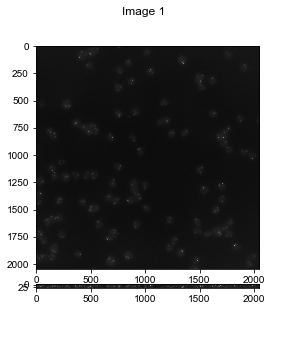

<IPython.core.display.Javascript object>


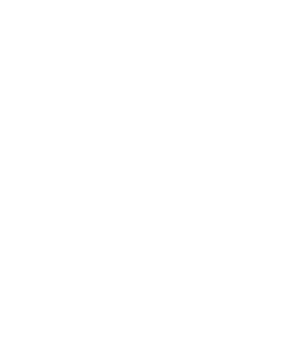

In [13]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [14]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 282 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.
E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


normalize total background:225.00, 282 fitted in 64.880s.
-- start fitting spots in channel:750, 286 seeded, normalize total background:225.00, 286 fitted in 65.358s.
-- start fitting spots in channel:647, 149 seeded, normalize total background:475.00, 149 fitted in 61.314s.


<IPython.core.display.Javascript object>


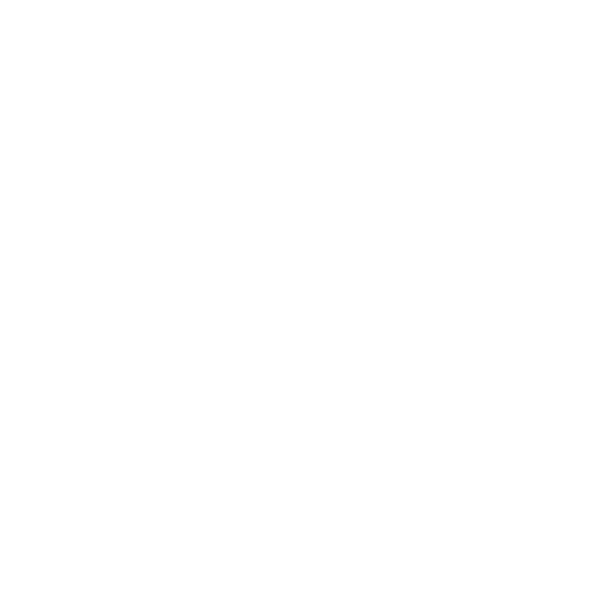

<IPython.core.display.Javascript object>


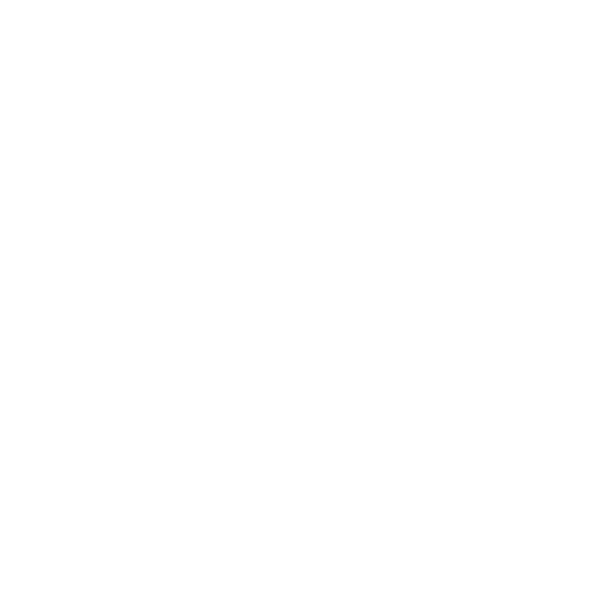

In [15]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

## visualize

In [ ]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

# bleedthrough correction

In [16]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750','647'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':1000,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 48 images in 12 threads in 4.895s.
- check 251 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.888, total: 0.888 in 1.053s
-- iter: 2, kept in this round: 0.812, total: 0.721 in 0.812s
-- iter: 3, kept in this round: 0.912, total: 0.657 in 0.547s
-- iter: 4, kept in this round: 0.958, total: 0.629 in 0.447s
- 158 pairs passed.
-- 158 spots are used to generate profiles from 750 to 647
[ 1.41736808e-01 -2.36026340e-03  1.49783664e-05  1.29790414e-05
  6.11938566e-05 -1.17812132e-07 -2.69354186e-07 -2.25819755e-09
 -1.96108768e-09 -2.04550586e-09] 0.12683711121044527
[ 2.58098085e+02 -4.14658409e+00  1.84452141e-01  1.70376024e-01
  1.82346129e-01 -1.90908923e-03 -1.98114575e-03 -7.09606545e-05
  1.74950887e-05 -5.43709842e-05] 0.5454243219906684
-- saving bleedthrough temp profile from channel: 750 to channel: 647.


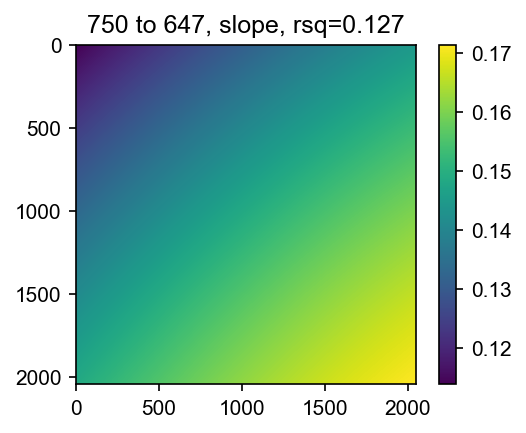

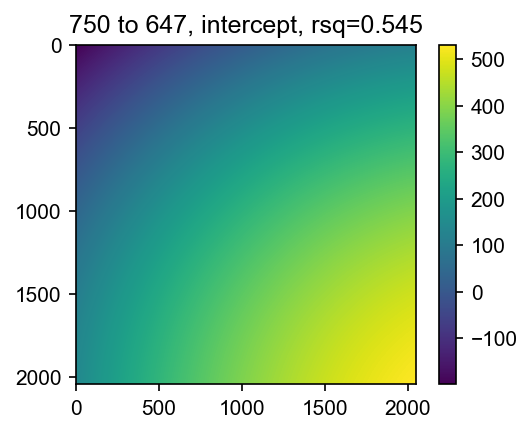

- check 185 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.886, total: 0.886 in 0.563s
-- iter: 2, kept in this round: 0.860, total: 0.762 in 0.438s
-- iter: 3, kept in this round: 0.894, total: 0.681 in 0.333s
-- iter: 4, kept in this round: 0.881, total: 0.600 in 0.244s
-- iter: 5, kept in this round: 0.919, total: 0.551 in 0.203s
-- iter: 6, kept in this round: 0.951, total: 0.524 in 0.172s
- 97 pairs passed.
-- 97 spots are used to generate profiles from 647 to 750
[ 2.95115925e-01  1.18858423e-03  7.28280618e-05 -2.47186033e-04
 -3.38943117e-05  2.69618228e-06 -4.43514815e-06  2.69276896e-08
 -1.78871689e-07  2.41686287e-07] 0.19483540488647577
[ 8.42876317e+01 -6.72257789e-01 -5.86029275e-02  1.78046881e-02
  4.37115015e-02 -2.71089904e-03  2.87735456e-03  1.72730040e-05
  6.63423993e-05 -6.64905182e-05] 0.14531203024270667
-- saving bleedthrough temp profile from channel: 647 to channel: 750.


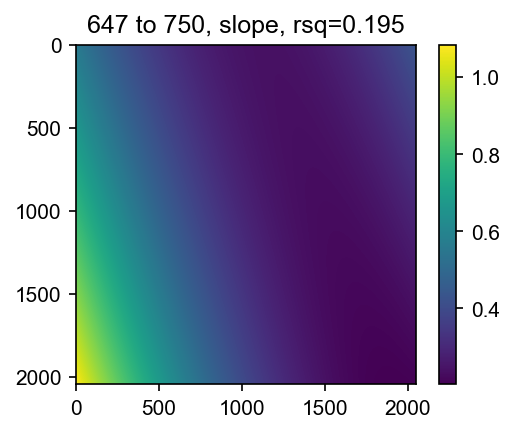

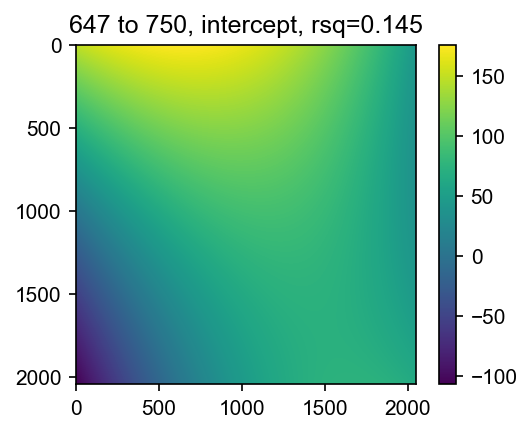

-- generating inverse matrix.
-- saving to file:\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\Corrections_2color\bleedthrough_correction_750_647_2048_2048.npy


In [28]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:3],
            rsq_th=0.8,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, 
            #num_images=30,
            num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [20]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [29]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[1], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H81R24Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H81R24Cy7\Conv_zscan_03.dax  in 35.831s
-- removing hot pixels for channels:['750', '647'] in 17.341s
-- illumination correction for channels: 750, 647, in 3.722s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 58.722s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H81R24Cy7\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
-- loa

<IPython.core.display.Javascript object>


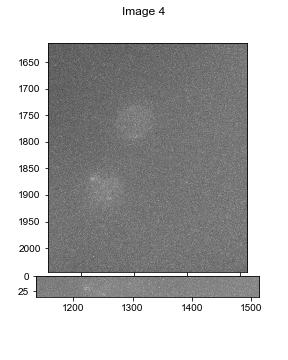

In [30]:
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [31]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[2], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H82R24Cy5\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H82R24Cy5\Conv_zscan_03.dax  in 19.351s
-- removing hot pixels for channels:['750', '647'] in 17.349s
-- illumination correction for channels: 750, 647, in 3.618s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 41.645s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H82R24Cy5\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
-- loa

<IPython.core.display.Javascript object>


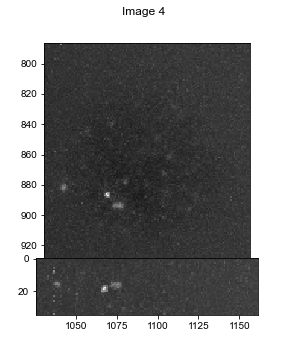

In [32]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[0], cy5_raw_ims[1], cy5_corr_ims[1], cy5_corr_ims[0]])